In [ ]:
from google.colab import files
f=files.upload()

Saving synthetic_food_dataset_imbalanced.csv to synthetic_food_dataset_imbalanced.csv


In [ ]:
import pandas as pd
food=pd.read_csv('synthetic_food_dataset_imbalanced.csv')
food

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [ ]:
class_distributions=food['Food_Name'].value_counts().reset_index()
class_distributions

,Food_Name,count
0,Pizza,6000
1,Burger,5000
2,Donut,4500
3,Pasta,4000
4,Sushi,3500
5,Ice Cream,3000
6,Steak,2000
7,Apple,1500
8,Banana,1200
9,Salad,1000


In [ ]:
import warnings
# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

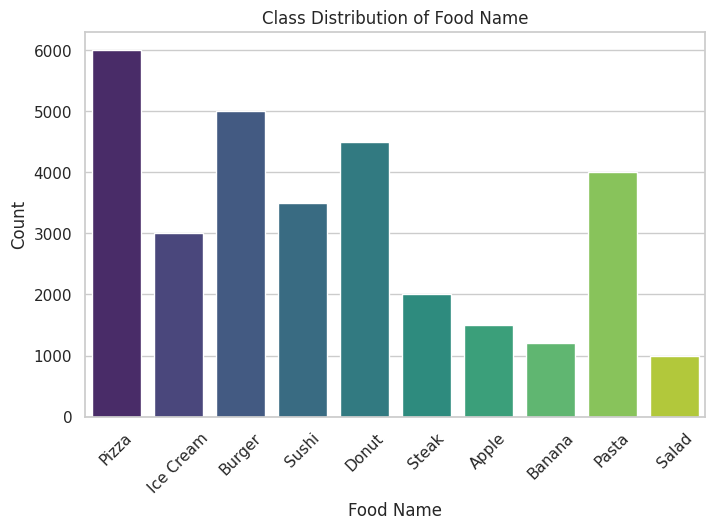

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Food_Name', data=food,palette='viridis')
plt.title('Class Distribution of Food Name')
plt.xticks(rotation=45)
plt.xlabel('Food Name')
plt.ylabel('Count')
plt.show()

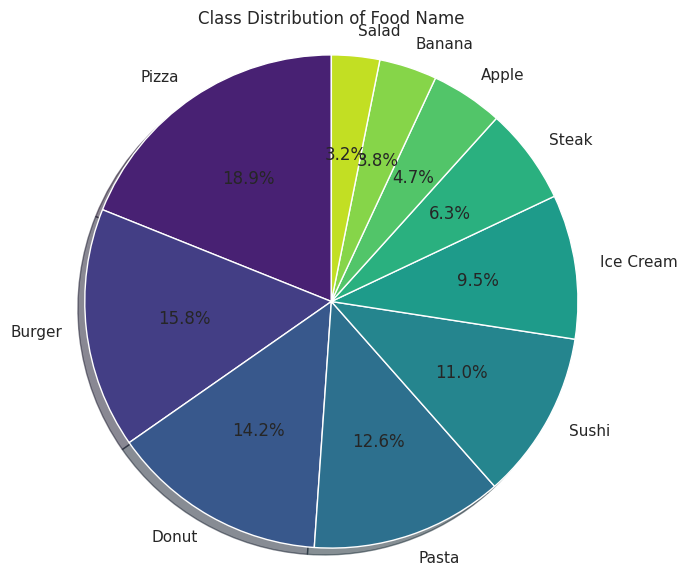

In [ ]:
counts = food['Food_Name'].value_counts()
labels = counts.index
sizes = counts.values
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True,
        colors=sns.color_palette('viridis', n_colors=len(labels)))
plt.title('Class Distribution of Food Name')
plt.axis('equal')
plt.show()

In [ ]:
print(f"Total data: {food.size}")

Total data: 507200


In [ ]:
rows,columns=food.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 31700, Number of columns: 16


In [ ]:
class_distributions=food['Food_Name'].value_counts().reset_index()
print(class_distributions)

   Food_Name  count
0      Pizza   6000
1     Burger   5000
2      Donut   4500
3      Pasta   4000
4      Sushi   3500
5  Ice Cream   3000
6      Steak   2000
7      Apple   1500
8     Banana   1200
9      Salad   1000


In [ ]:
missing_data = food.isnull().sum()
missingdata = pd.DataFrame({'Missing Count': missing_data})
print(missingdata[missingdata['Missing Count'] > 0])

                Missing Count
Calories                  375
Protein                   375
Fat                       375
Carbs                     375
Sugar                     375
Fiber                     375
Sodium                    375
Cholesterol               375
Glycemic_Index            375
Water_Content             375
Serving_Size              375


In [ ]:
missing_percent = round(food.isnull().mean() * 100, 2)
print(missing_percent.sort_values(ascending=False))

Calories              1.18
Protein               1.18
Fat                   1.18
Carbs                 1.18
Sugar                 1.18
Fiber                 1.18
Sodium                1.18
Cholesterol           1.18
Glycemic_Index        1.18
Water_Content         1.18
Serving_Size          1.18
Meal_Type             0.00
Preparation_Method    0.00
Is_Vegan              0.00
Is_Gluten_Free        0.00
Food_Name             0.00
dtype: float64


In [ ]:
food_df = food.dropna()
food_df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


In [ ]:
food_df = food_df.drop_duplicates()
food_df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


In [ ]:
# Cap outliers in numeric columns using IQR method
import numpy as np
num_cols = food_df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = food_df[col].quantile(0.25)
    Q3 = food_df[col].quantile(0.75)
    IQR = Q3 - Q1
    food_df[col] = food_df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
print("Outliers removed")

Outliers removed


/tmp/ipython-input-2761318110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = food_df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
/tmp/ipython-input-2761318110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = food_df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
/tmp/ipython-input-2761318110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
# Encode binary categorical columns
from sklearn.preprocessing import LabelEncoder
for col in ['Is_Vegan', 'Is_Gluten_Free']:
    if col in food_df.columns:
        food_df[col] = LabelEncoder().fit_transform(food_df[col])

/tmp/ipython-input-1729585765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = LabelEncoder().fit_transform(food_df[col])
/tmp/ipython-input-1729585765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[col] = LabelEncoder().fit_transform(food_df[col])


In [ ]:
# Prepare features and target
X = food_df.drop(['Meal_Type', 'Food_Name'], axis=1, errors='ignore')
y = food_df['Meal_Type']

In [ ]:
# One hot encoding
cat_cols = X.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [ ]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,0,0,True,False,False
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,0,1,False,False,True
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,0,0,False,False,True
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,0,1,True,False,False
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,72.391348,120.293342,1,1,True,False,False
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,0,0,False,False,True
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,0,0,False,True,False
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,0,0,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    solver='lbfgs'
)
model.fit(X_train_selected, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [ ]:
# Predict and evaluate
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2%}")


Test Accuracy: 24.34%
